In [ ]:
# Logistic Regression Implementation using Numpy - Sklearn

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import copy

In [ ]:
# Data Representation

In [4]:
np.random.seed(0)
X_class0 = np.random.multivariate_normal([1, 1], [[0.5, 0], [0, 0.5]], 50)
X_class1 = np.random.multivariate_normal([3, 3], [[0.5, 0], [0, 0.5]], 50)
X = np.vstack((X_class0, X_class1))
y = np.hstack((np.zeros(50), np.ones(50)))

In [ ]:
# Ploting the data before building the model

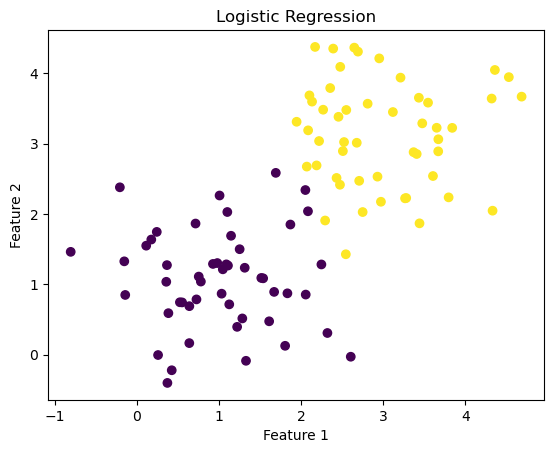

In [18]:
plt.scatter(X[:,0],X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression')
plt.show()

In [20]:
# Sigmoid function

In [26]:
def sigmoid(z):
    return 1 / (1+ np.exp(-z))

In [28]:
# prediction Function

In [30]:
def predict(X,w,b):
    z = np.dot(X,w)+b
    return sigmoid(z)

In [32]:
# Cost Function

In [34]:
def compute_cost(X,y,w,b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i], w) + b)
        cost += y[i] * np.log(f_wb_i) + (1 - y[i]) * np.log(1 - f_wb_i)
    cost = -cost / m
    return cost

In [36]:
# Gradient Descent

In [38]:
def compute_gradient(X,y,w,b):
    m,n = X.shape
    dj_dw = np.zeros((n,))
    dj_db = 0.0
    for i in range(m):
        f_wb_i = sigmoid(np.dot(X[i],w) + b)
        err_i = f_wb_i - y[i]
        for j in range(n):
            dj_dw[j] += err_i * X[i,j]
        dj_db += err_i
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    return dj_dw, dj_db

In [40]:
def gradient_descent(X,y,w_in,b_in,alpha,num_iters):
    w  = copy.deepcopy(w_in)
    b = b_in
    for _ in range(num_iters):
        dj_dw, dj_db = compute_gradient(X,y,w,b)
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
    return w, b

In [42]:
# train the model

In [44]:
w_init = np.zeros(X.shape[1])
b_init = 0.0
alpha = 0.01
num_iters = 5000

In [46]:
w,b = gradient_descent(X,y,w_init,b_init,alpha,num_iters)
print("w = ", w)
print("b = ", b)

w =  [1.07359792 1.04744428]
b =  -3.9697221229542734


In [48]:
# make prediction

In [50]:
X_test = np.array([[1, 1.5], [2, 1], [1.5, 1],[4.0,4]])
y_pred = predict(X_test,w,b)
print(y_pred)

[0.20999463 0.31538079 0.21217226 0.98916893]


In [52]:
for i in range(y_pred.shape[0]):
    if y_pred[i] > 0.5:
        print("class 1")
    else:
        print("class 0")

class 0
class 0
class 0
class 1


In [56]:
# Ploting the data with decision boundry

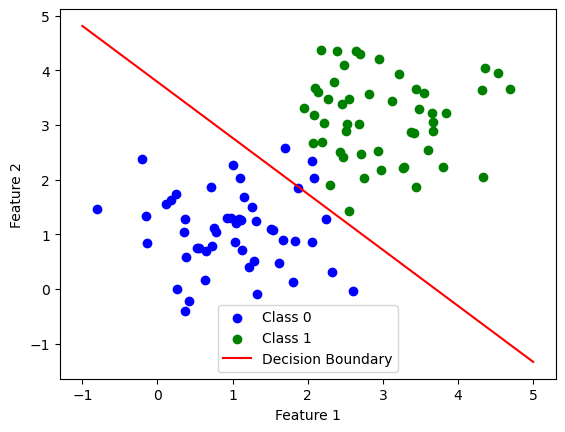

In [70]:
# Scatter plot for the two classes
plt.scatter(X_class0[:, 0], X_class0[:, 1], color='blue', label='Class 0')
plt.scatter(X_class1[:, 0], X_class1[:, 1], color='green', label='Class 1')

# Line plot for the decision boundary
x = np.linspace(-1, 5, 100)
y = -(w[0] * x + b) / w[1]
plt.plot(x, y, color='red', label='Decision Boundary')

# Adding labels and legend
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()

# Display the plot
plt.show()

In [ ]:
# Implementation using sklearn using the same data

In [90]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [92]:
np.random.seed(0)
X_class0 = np.random.multivariate_normal([1, 1], [[0.5, 0], [0, 0.5]], 50)
X_class1 = np.random.multivariate_normal([3, 3], [[0.5, 0], [0, 0.5]], 50)
X = np.vstack((X_class0, X_class1))
y = np.hstack((np.zeros(50), np.ones(50)))

In [94]:
# split the data

In [96]:
X_train , X_test , y_train , y_test = train_test_split(X,y,test_size = 0.2)

In [98]:
# create and instance of the model

In [100]:
model = LogisticRegression()
model.fit(X_train, y_train)

In [104]:
# print the parameters
print('w:',model.coef_)
print('b:',model.intercept_)

w: [[2.01372904 1.85429415]]
b: [-8.03494645]


In [106]:
# make predictions
y_pred = model.predict(X_test)
print('prediction for test data:',y_pred)
print('actual test data:',y_test)
# evaluate the model
accuracy = model.score(X_test, y_test)
print('accuracy:',accuracy)

prediction for test data: [0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.]
actual test data: [0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 1. 1. 1.]
accuracy: 0.95


In [112]:
# Plot the data without decision boundary

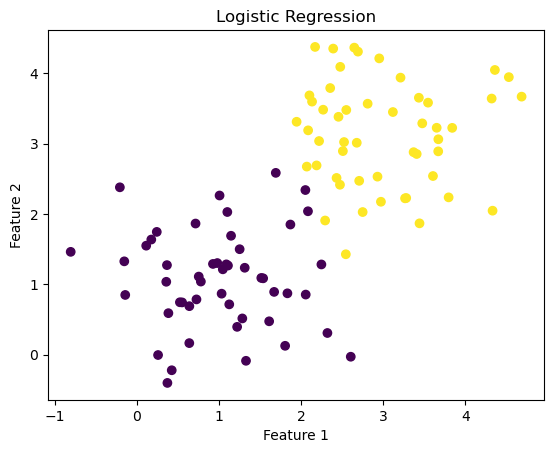

In [114]:
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression')
plt.show()

In [116]:
# Plot the data with decision boundary

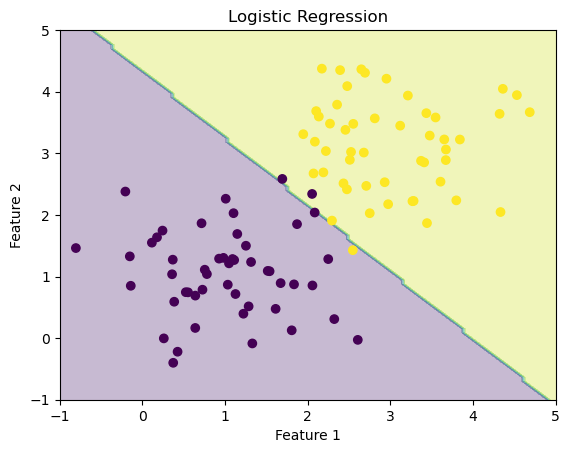

In [110]:
x1 = np.linspace(-1, 5, 100)
x2 = np.linspace(-1, 5, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = model.predict(np.c_[X1.ravel(), X2.ravel()])
Z = Z.reshape(X1.shape)
plt.contourf(X1, X2, Z, alpha=0.3)
plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Logistic Regression')
plt.show()